In [14]:
import os

In [15]:
import numpy as np

In [16]:
%load_ext importnb
import GANstructure

The importnb extension is already loaded. To reload it, use:
  %reload_ext importnb


In [17]:
RUN_FOLDER='run/'
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))

In [18]:
path1='../data/camel/full_numpy_bitmap_camel.npy'

In [19]:
mydata=np.load(path1)

In [20]:
mydata

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
mydata.shape

(121399, 784)

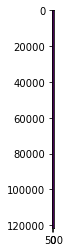

In [27]:
fig=plt.figure(figsize=(8, 4))
plt.imshow(mydata)
plt.show()

In [31]:
camel_path='camel'

In [18]:
camelpath1='../data/camel/'

In [24]:
def load_camel(camel_path):
    names=[]
    #mypath=os.path.join('/data/',camel_path)
    for (dirpath,dirnames,fnames) in os.walk(camelpath1):
        for f in fnames:
            print(f)

In [28]:
listoo=[]

In [29]:
for (dirpath,dirnames,fnames) in os.walk(camelpath1):
        for f in fnames:
            listoo.append(f)
            #print(f)

In [31]:
listoo

['full_numpy_bitmap_camel.npy']

In [33]:
for names in listoo:
    print(names)

full_numpy_bitmap_camel.npy


In [11]:
camelpath1

'/data/camel/'

In [8]:
load_camel(camelpath1)

In [24]:
(x_train,y_train)=load_camel(camel_path)

TypeError: cannot unpack non-iterable NoneType object

In [1]:
path1='../data/camel/full_numpy_bitmap_camel.npy'

In [45]:
txt_name_list=[]
for (dirpath, dirnames, filenames) in os.walk(path1):
    for f in filenames:
            txt_name_list.append(f)
            break

In [46]:
txt_name_list

[]